In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from utils.eval import score
from utils.models import CentroidSMOTE
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/Occupancy_detection/data_test.txt"
Test_path = "../datasets/Occupancy_detection/data_train.txt"
train_df = pd.read_csv(Train_path)
test_df = pd.read_csv(Test_path)

In [4]:
print(len(train_df['date'].unique()))
train_df = train_df.drop(['date'], axis=1)
test_df = test_df.drop(['date'], axis = 1)

2665


The dataset has no none or object type values.

In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
dict((i, list_dtype.count(i)) for i in list_dtype)

{dtype('float64'): 5, dtype('int64'): 1}

In [6]:
train_df['Occupancy'].value_counts()

Occupancy
0    1693
1     972
Name: count, dtype: int64

In [7]:
label_encoder = LabelEncoder()
train_df['Occupancy'] = label_encoder.fit_transform(train_df['Occupancy'])
test_df['Occupancy'] = label_encoder.transform(test_df['Occupancy'])

In [8]:
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
y_train = train_df['Occupancy']
y_test = test_df['Occupancy']
X_train = train_df.drop(['Occupancy'], axis = 1)
X_test = test_df.drop(['Occupancy'], axis = 1)

In [9]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [10]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.960213
Error Rate: 0.03978671041837567
Precision: 0.926640
Recall: 0.961203
F1-score: 0.942449
Selectivity: 0.961203
Balanced Accuracy: 0.961203
Geometric Mean: 0.961203


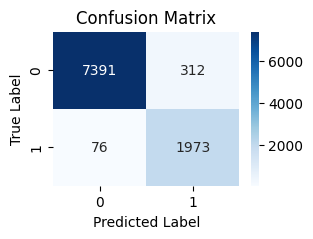

In [11]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.959085
Error Rate: 0.040914684167350335
Precision: 0.923847
Recall: 0.961921
F1-score: 0.941079
Selectivity: 0.961921
Balanced Accuracy: 0.961921
Geometric Mean: 0.961921


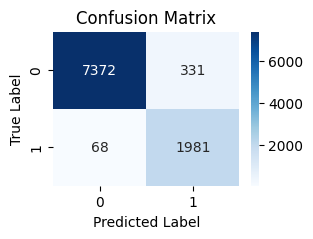

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.956214
Error Rate: 0.043785890073831046
Precision: 0.919965
Recall: 0.957417
F1-score: 0.936924
Selectivity: 0.957417
Balanced Accuracy: 0.957417
Geometric Mean: 0.957417


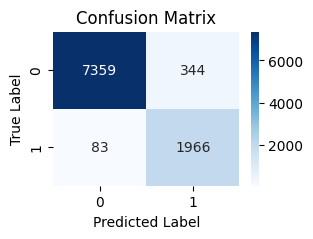

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.958983
Error Rate: 0.04101722723543888
Precision: 0.924741
Recall: 0.959707
F1-score: 0.940708
Selectivity: 0.959707
Balanced Accuracy: 0.959707
Geometric Mean: 0.959707


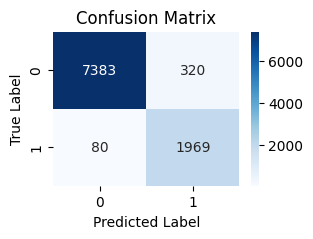

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.959906
Error Rate: 0.04009433962264153
Precision: 0.925340
Recall: 0.962441
F1-score: 0.942185
Selectivity: 0.962441
Balanced Accuracy: 0.962441
Geometric Mean: 0.962441


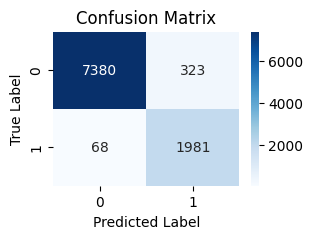

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.959085
Error Rate: 0.040914684167350335
Precision: 0.924114
Recall: 0.961384
F1-score: 0.941021
Selectivity: 0.961384
Balanced Accuracy: 0.961384
Geometric Mean: 0.961384


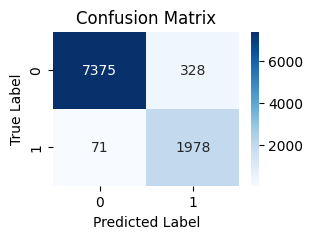

In [12]:
sm_list = []
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
    
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.956727
Error Rate: 0.04327317473338799
Precision: 0.921963
Recall: 0.955592
F1-score: 0.937365
Selectivity: 0.955592
Balanced Accuracy: 0.955592
Geometric Mean: 0.955592


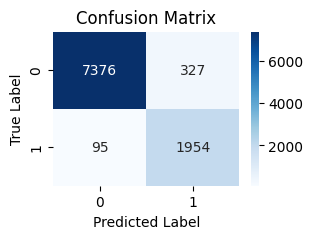

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.958162
Error Rate: 0.041837571780147687
Precision: 0.924338
Recall: 0.957039
F1-score: 0.939363
Selectivity: 0.957039
Balanced Accuracy: 0.957039
Geometric Mean: 0.957039


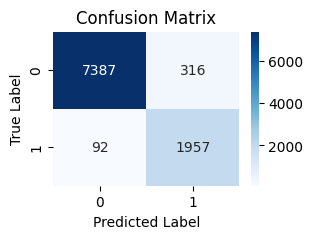

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.955906
Error Rate: 0.04409351927809679
Precision: 0.919496
Recall: 0.957043
F1-score: 0.936491
Selectivity: 0.957043
Balanced Accuracy: 0.957043
Geometric Mean: 0.957043


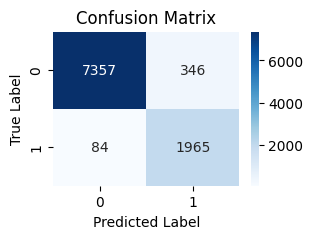

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.955496
Error Rate: 0.044503691550451197
Precision: 0.919448
Recall: 0.955351
F1-score: 0.935774
Selectivity: 0.955351
Balanced Accuracy: 0.955351
Geometric Mean: 0.955351


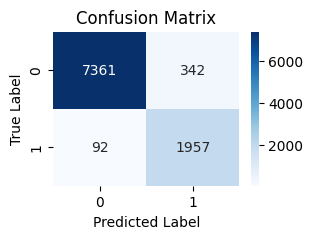

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.958060
Error Rate: 0.04194011484823623
Precision: 0.924054
Recall: 0.957153
F1-score: 0.939244
Selectivity: 0.957153
Balanced Accuracy: 0.957153
Geometric Mean: 0.957153


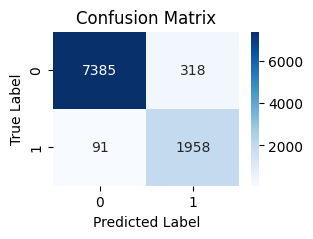

In [13]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))
    
for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)